In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [237]:
#paramters
r = 16
sigma = 10
b = 8/3
h = 0.001
params = [r, sigma, b, h]
#X, Y, Z = 0, -5, 5
XYZs = [ [5, 5, 5], [5, -5, 5], [-5, 5, 5], [-5, -5, 5], [0, 5, 5], [0, -5, 5]]

In [174]:
#Lorenz equation
def dXdt(state, params, add=0):
    X, Y, _ = state
    sigma = params[1]
    X += add

    return sigma * (Y - X)

def dYdt(state, params, add=0):
    X, Y, Z = state
    r = params[0]
    Y += add

    return r*X - Y - X*Z

def dZdt(state, params, add=0):
    X, Y, Z = state
    b = params[2]
    Z += add

    return X*Y - b*Z


#Runge-Kutta method increment calculation
def RK4_increment(state, params, F):
    h = params[3]

    k_1 = h * F(state, params)
    k_2 = h * F(state, params, k_1 / 2)
    k_3 = h * F(state, params, k_2 / 2)
    k_4 = h * F(state, params, k_3)

    return (k_1 + 2*k_2 + 2*k_3 + k_4)/6


def RK4_step(state, params):
    X_incr = RK4_increment(state, params, dXdt)
    Y_incr = RK4_increment(state, params, dYdt)
    Z_incr = RK4_increment(state, params, dZdt)
    state = np.array(state)
    return state + np.array([X_incr, Y_incr, Z_incr])

([5, 5, 5], [6.3245553203299485, 6.3245553203261125, 14.999999999999645])
([5, -5, 5], [6.32455532037658, 6.3245553204234035, 14.99999999996213])
([-5, 5, 5], [-6.32455532037658, -6.3245553204234035, 14.99999999996213])
([-5, -5, 5], [-6.3245553203299485, -6.3245553203261125, 14.999999999999645])
([0, 5, 5], [6.3245553203481935, 6.324555320347687, 15.000000000011951])
([0, -5, 5], [-6.3245553203481935, -6.324555320347687, 15.000000000011951])


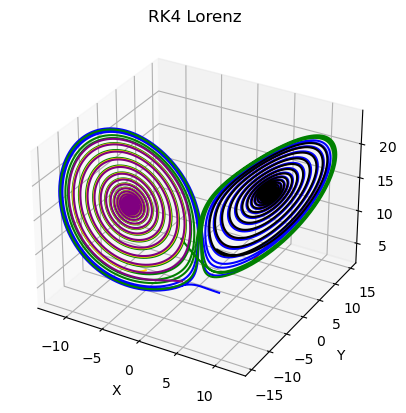

In [243]:
#state = [X, Y, Z]



#X_values = [X]
#Y_values = [Y]
#Z_values = [Z]

#loop
#for t in range(100000):
#    state = RK4_step(state, params)
#    X_values.append(state[0])
#    Y_values.append(state[1])
#    Z_values.append(state[2])


def simulate(state, values, trials, iters):
    
    X_values, Y_values, Z_values = values

    for i in range(trials):
        for t in range(iters):
            state[i] = RK4_step(state[i], params)
            X_values[i].append(state[i][0])
            Y_values[i].append(state[i][1])
            Z_values[i].append(state[i][2])

    return X_values, Y_values, Z_values




X_values, Y_values, Z_values = map( list, zip(*XYZs) )

X_values = [ [x] for x in X_values] #list comprehension
Y_values = [ [x] for x in Y_values]
Z_values = [ [x] for x in Z_values]

values = X_values, Y_values, Z_values

state = copy.deepcopy(XYZs)

simulate(state, values, 6, 100000)

for item in zip(XYZs, [x.tolist() for x in state]):
    print(item)

#plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(X_values[0], Y_values[0], Z_values[0], color = "red")
ax.plot(X_values[1], Y_values[1], Z_values[1], color = "blue")
ax.plot(X_values[2], Y_values[2], Z_values[2], color = "green")
ax.plot(X_values[3], Y_values[3], Z_values[3], color = "gold")
ax.plot(X_values[4], Y_values[4], Z_values[4], color = "black")
ax.plot(X_values[5], Y_values[5], Z_values[5], color = "purple")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('RK4 Lorenz')
plt.show()